In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [7]:
df.shape

(3553, 18)

In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,22377.0,4.0,4.0,3,2.0,Relatively New,3240.0,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,3.0,3.0,2,0.0,New Property,1593.0,0,0,0,0,1,0,35
2,flat,dlf the ultima,sector 81,2.25,10553.0,3.0,3.0,3+,6.0,New Property,1929.0,0,1,0,0,0,1,168
3,house,independent,sector 57,6.25,2778.0,9.0,9.0,3+,3.0,New Property,2660.0,0,1,0,0,0,2,61
4,flat,umang monsoon breeze,sector 78,0.95,5491.0,3.0,3.0,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65


In [11]:
train_df = df.drop(columns=['society','price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 48,7.25,4.0,4.0,3,2.0,Relatively New,3240.0,1,1,1,1,0,2,103
1,flat,sector 37c,0.86,3.0,3.0,2,0.0,New Property,1593.0,0,0,0,0,1,0,35
2,flat,sector 81,2.25,3.0,3.0,3+,6.0,New Property,1929.0,0,1,0,0,0,1,168
3,house,sector 57,6.25,9.0,9.0,3+,3.0,New Property,2660.0,0,1,0,0,0,2,61
4,flat,sector 78,0.95,3.0,3.0,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65


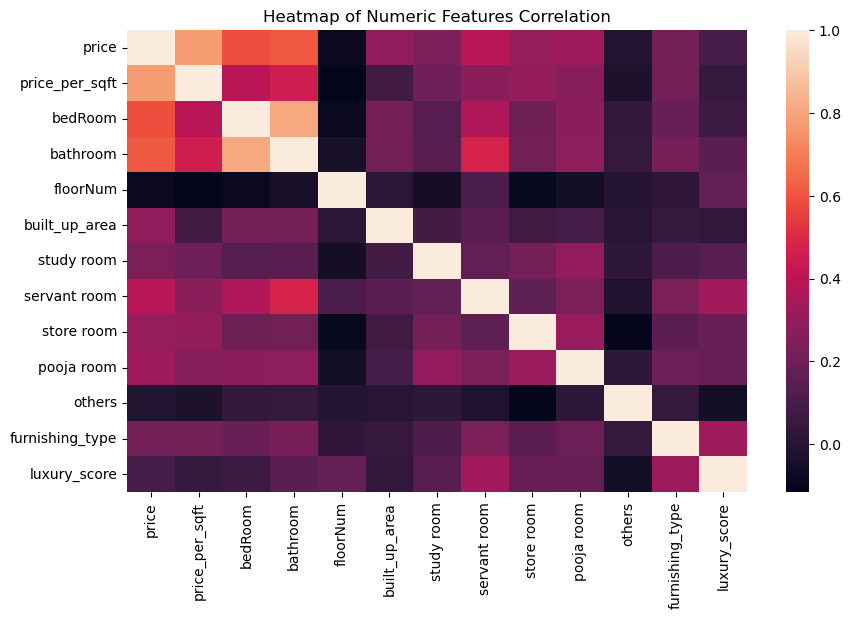

In [23]:
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr())
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

In [27]:
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
price_per_sqft     0.776849
bathroom           0.609331
bedRoom            0.587034
servant room       0.391808
pooja room         0.321067
store room         0.307483
built_up_area      0.286725
study room         0.237082
furnishing_type    0.214506
luxury_score       0.091976
others            -0.013878
floorNum          -0.087557
Name: price, dtype: float64

<Axes: >

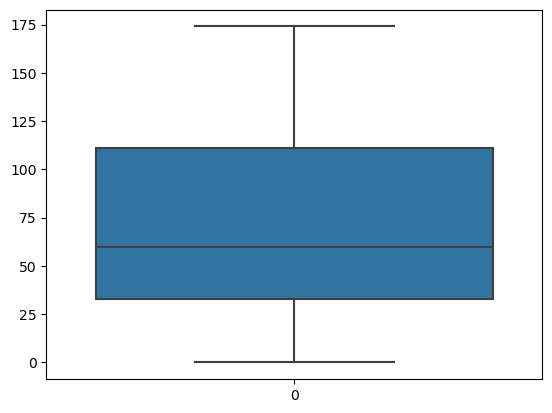

In [29]:
sns.boxplot(df['luxury_score'])

In [31]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [33]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 48,7.25,4.0,4.0,3,2.0,Relatively New,3240.0,1,1,1,1,0,2,103,Medium
1,flat,sector 37c,0.86,3.0,3.0,2,0.0,New Property,1593.0,0,0,0,0,1,0,35,Low
2,flat,sector 81,2.25,3.0,3.0,3+,6.0,New Property,1929.0,0,1,0,0,0,1,168,High
3,house,sector 57,6.25,9.0,9.0,3+,3.0,New Property,2660.0,0,1,0,0,0,2,61,Medium
4,flat,sector 78,0.95,3.0,3.0,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65,Medium


<Axes: >

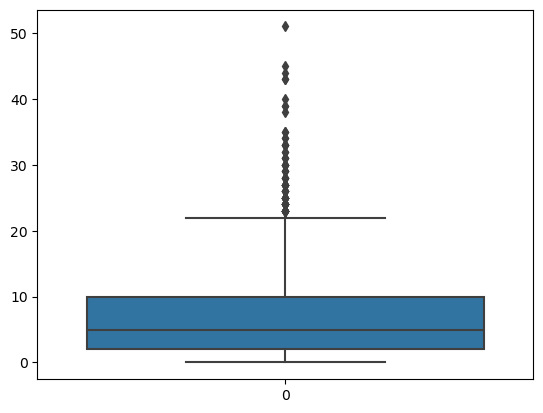

In [35]:
sns.boxplot(df['floorNum'])

In [37]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [39]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 48,7.25,4.0,4.0,3,2.0,Relatively New,3240.0,1,1,1,1,0,2,103,Medium,Low Floor
1,flat,sector 37c,0.86,3.0,3.0,2,0.0,New Property,1593.0,0,0,0,0,1,0,35,Low,Low Floor
2,flat,sector 81,2.25,3.0,3.0,3+,6.0,New Property,1929.0,0,1,0,0,0,1,168,High,Mid Floor
3,house,sector 57,6.25,9.0,9.0,3+,3.0,New Property,2660.0,0,1,0,0,0,2,61,Medium,Mid Floor
4,flat,sector 78,0.95,3.0,3.0,2,9.0,Relatively New,1730.0,0,0,0,0,0,2,65,Medium,Mid Floor


In [41]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 48,7.25,4.0,4.0,3,Relatively New,3240.0,1,1,1,1,0,2,Medium,Low Floor
1,flat,sector 37c,0.86,3.0,3.0,2,New Property,1593.0,0,0,0,0,1,0,Low,Low Floor
2,flat,sector 81,2.25,3.0,3.0,3+,New Property,1929.0,0,1,0,0,0,1,High,Mid Floor
3,house,sector 57,6.25,9.0,9.0,3+,New Property,2660.0,0,1,0,0,0,2,Medium,Mid Floor
4,flat,sector 78,0.95,3.0,3.0,2,Relatively New,1730.0,0,0,0,0,0,2,Medium,Mid Floor


In [43]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [45]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,56.0,4.0,4.0,3.0,3.0,3240.0,1,1,1,1,0,2,2.0,1.0
1,0.0,45.0,3.0,3.0,2.0,1.0,1593.0,0,0,0,0,1,0,1.0,1.0
2,0.0,94.0,3.0,3.0,4.0,1.0,1929.0,0,1,0,0,0,1,0.0,2.0
3,1.0,66.0,9.0,9.0,4.0,1.0,2660.0,0,1,0,0,0,2,2.0,2.0
4,0.0,90.0,3.0,3.0,2.0,3.0,1730.0,0,0,0,0,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,12.0,3.0,3.0,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
3549,1.0,49.0,2.0,2.0,2.0,0.0,61.0,0,0,0,0,1,0,1.0,1.0
3550,0.0,45.0,3.0,3.0,3.0,1.0,1500.0,0,0,0,0,0,2,1.0,2.0
3551,0.0,12.0,3.0,4.0,2.0,1.0,2003.0,0,0,0,0,0,0,2.0,2.0


In [47]:
y_label

0       7.25
1       0.86
2       2.25
3       6.25
4       0.95
        ... 
3548    0.85
3549    0.61
3550    1.05
3551    2.90
3552    1.08
Name: price, Length: 3553, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

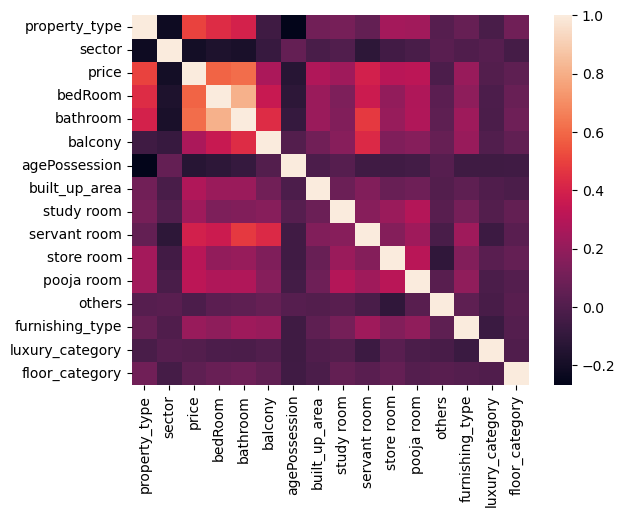

In [50]:
 sns.heatmap(data_label_encoded.corr())

In [52]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.199530
1,price,1.000000
2,bedRoom,0.587034
3,bathroom,0.609331
4,balcony,0.270895
5,agePossession,-0.137253
6,built_up_area,0.286725
7,study room,0.237082
8,servant room,0.391808
9,store room,0.307483


### Technique 2 - Random Forest Feature Importance

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2


,feature,rf_importance
6,built_up_area,0.629709
0,property_type,0.114322
1,sector,0.110372
2,bedRoom,0.027662
3,bathroom,0.025064
8,servant room,0.024506
4,balcony,0.013788
5,agePossession,0.013063
7,study room,0.007464
12,furnishing_type,0.006769


### Technique 3 - Gradient Boosting Feature importances

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.658849
1,sector,0.110943
0,property_type,0.103169
3,bathroom,0.041081
2,bedRoom,0.036945
8,servant room,0.026272
9,store room,0.007749
5,agePossession,0.005373
7,study room,0.002297
12,furnishing_type,0.001922


### Technique 4 - Permutation Importance

In [63]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.743513
1,sector,0.193750
0,property_type,0.187399
8,servant room,0.020676
2,bedRoom,0.012674
4,balcony,0.012009
5,agePossession,0.005835
3,bathroom,0.003545
14,floor_category,0.001416
7,study room,0.000613


### Technique 5 - LASSO

In [66]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
0,property_type,0.768994
3,bathroom,0.600520
2,bedRoom,0.408555
8,servant room,0.380354
6,built_up_area,0.370855
9,store room,0.241813
7,study room,0.214797
12,furnishing_type,0.130930
10,pooja room,0.117245
13,luxury_category,0.077852


In [68]:
### Technique 6 - RFE

In [70]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.624736
0,property_type,0.114812
1,sector,0.109113
3,bathroom,0.028170
2,bedRoom,0.027736
8,servant room,0.021685
5,agePossession,0.013065
4,balcony,0.013023
7,study room,0.008926
13,luxury_category,0.007607


### Technique 7 - Linear Regression Weights

In [77]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
0,property_type,0.774727
3,bathroom,0.598014
2,bedRoom,0.408754
8,servant room,0.382828
6,built_up_area,0.378009
9,store room,0.244317
7,study room,0.220994
12,furnishing_type,0.137896
10,pooja room,0.120277
13,luxury_category,0.087959


### Technique 8 - SHAP

In [80]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.0 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [82]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 1.4506429 ,  0.26936292, -0.1439167 , ..., -0.02499981,
        -0.04035922, -0.02443225],
       [-0.27497904, -0.200271  , -0.02988423, ..., -0.00703358,
        -0.00206033, -0.02103921],
       [-0.30980063, -0.01143557, -0.03018844, ...,  0.05586251,
         0.04607735, -0.01943115],
       ...,
       [-0.30887655, -0.15757805, -0.02118625, ...,  0.01781569,
         0.00593912, -0.01813197],
       [-0.26854895,  0.05617727, -0.02623385, ..., -0.00413838,
         0.01428056, -0.04433593],
       [-0.29543126, -0.16999489, -0.02724485, ..., -0.00813423,
         0.00579718, -0.03013097]])

In [84]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8


,feature,SHAP_score
6,built_up_area,1.241261
0,property_type,0.495306
1,sector,0.409030
3,bathroom,0.115777
8,servant room,0.110795
2,bedRoom,0.059800
4,balcony,0.042982
5,agePossession,0.026221
14,floor_category,0.023688
12,furnishing_type,0.019591


In [86]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.199530,0.110372,0.110943,0.193750,-0.131471,0.109113,-0.139346,0.409030
bedRoom,0.587034,0.027662,0.036945,0.012674,0.408555,0.027736,0.408754,0.059800
bathroom,0.609331,0.025064,0.041081,0.003545,0.600520,0.028170,0.598014,0.115777
balcony,0.270895,0.013788,0.001561,0.012009,0.056194,0.013023,0.063054,0.042982
agePossession,-0.137253,0.013063,0.005373,0.005835,-0.010685,0.013065,-0.018022,0.026221
built_up_area,0.286725,0.629709,0.658849,0.743513,0.370855,0.624736,0.378009,1.241261
study room,0.237082,0.007464,0.002297,0.000613,0.214797,0.008926,0.220994,0.016182
servant room,0.391808,0.024506,0.026272,0.020676,0.380354,0.021685,0.382828,0.110795
store room,0.307483,0.006519,0.007749,-0.006779,0.241813,0.007593,0.244317,0.014557


In [88]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.699177
sector             0.152488
bathroom           0.032865
servant room       0.030989
bedRoom            0.028993
balcony            0.012918
agePossession      0.010770
study room         0.005871
floor_category     0.005467
furnishing_type    0.005199
store room         0.004913
luxury_category    0.004798
pooja room         0.003407
others             0.002145
dtype: float64

In [90]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,56.0,4.0,4.0,3.0,3.0,3240.0,1,1,1,1,0,2,2.0,1.0
1,0.0,45.0,3.0,3.0,2.0,1.0,1593.0,0,0,0,0,1,0,1.0,1.0
2,0.0,94.0,3.0,3.0,4.0,1.0,1929.0,0,1,0,0,0,1,0.0,2.0
3,1.0,66.0,9.0,9.0,4.0,1.0,2660.0,0,1,0,0,0,2,2.0,2.0
4,0.0,90.0,3.0,3.0,2.0,3.0,1730.0,0,0,0,0,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,12.0,3.0,3.0,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
3549,1.0,49.0,2.0,2.0,2.0,0.0,61.0,0,0,0,0,1,0,1.0,1.0
3550,0.0,45.0,3.0,3.0,3.0,1.0,1500.0,0,0,0,0,0,2,1.0,2.0
3551,0.0,12.0,3.0,4.0,2.0,1.0,2003.0,0,0,0,0,0,0,2.0,2.0


In [92]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [94]:
scores.mean()

0.8054346865522085

In [96]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')


In [98]:
scores.mean()

0.8012358518460785

In [100]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,56.0,4.0,4.0,3.0,3.0,3240.0,1,1,2,2.0,1.0,7.25
1,0.0,45.0,3.0,3.0,2.0,1.0,1593.0,0,0,0,1.0,1.0,0.86
2,0.0,94.0,3.0,3.0,4.0,1.0,1929.0,1,0,1,0.0,2.0,2.25
3,1.0,66.0,9.0,9.0,4.0,1.0,2660.0,1,0,2,2.0,2.0,6.25
4,0.0,90.0,3.0,3.0,2.0,3.0,1730.0,0,0,2,2.0,2.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,12.0,3.0,3.0,2.0,3.0,1500.0,1,0,0,2.0,1.0,0.85
3549,1.0,49.0,2.0,2.0,2.0,0.0,61.0,0,0,0,1.0,1.0,0.61
3550,0.0,45.0,3.0,3.0,3.0,1.0,1500.0,0,0,2,1.0,2.0,1.05
3551,0.0,12.0,3.0,4.0,2.0,1.0,2003.0,0,0,0,2.0,2.0,2.90
